<a href="https://colab.research.google.com/github/RoshanKumar854/DSE-Projects/blob/main/Trix_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required libraries


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#Importing the dataset

In [27]:
df = pd.read_csv('wage.csv')

In [28]:
print(df)

      Unnamed: 0  year  age  ... health_ins   logwage        wage
0         231655  2006   18  ...      2. No  4.318063   75.043154
1          86582  2004   24  ...      2. No  4.255273   70.476020
2         161300  2003   45  ...     1. Yes  4.875061  130.982177
3         155159  2003   43  ...     1. Yes  5.041393  154.685293
4          11443  2005   50  ...     1. Yes  4.318063   75.043154
...          ...   ...  ...  ...        ...       ...         ...
2995      376816  2008   44  ...     1. Yes  5.041393  154.685293
2996      302281  2007   30  ...      2. No  4.602060   99.689464
2997       10033  2005   27  ...      2. No  4.193125   66.229408
2998       14375  2005   27  ...     1. Yes  4.477121   87.981033
2999      453557  2009   55  ...     1. Yes  4.505150   90.481913

[3000 rows x 12 columns]


#Setting our Indpendent and Dependent variables

In [29]:
x = df[['age','education','health']]
y = df['logwage']

In [30]:
print(x)

      age      education     health
0      18      < HS Grad       Good
1      24   College Grad  Very Good
2      45   Some College       Good
3      43   College Grad  Very Good
4      50        HS Grad       Good
...   ...            ...        ...
2995   44   Some College  Very Good
2996   30        HS Grad  Very Good
2997   27      < HS Grad       Good
2998   27   Some College  Very Good
2999   55        HS Grad       Good

[3000 rows x 3 columns]


#Encoding our categorical variables 

In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['education'] = label_encoder.fit_transform(df['education']) 
df['health'] = label_encoder.fit_transform(df['health'])

In [32]:
df['education']
df['health']

0       0
1       1
2       0
3       1
4       0
       ..
2995    1
2996    1
2997    0
2998    1
2999    0
Name: health, Length: 3000, dtype: int64

In [33]:
x = df[['age','education','health']]
y = df['logwage']

#Plotting our dependent variables against different independent variables

Text(0, 0.5, 'health')

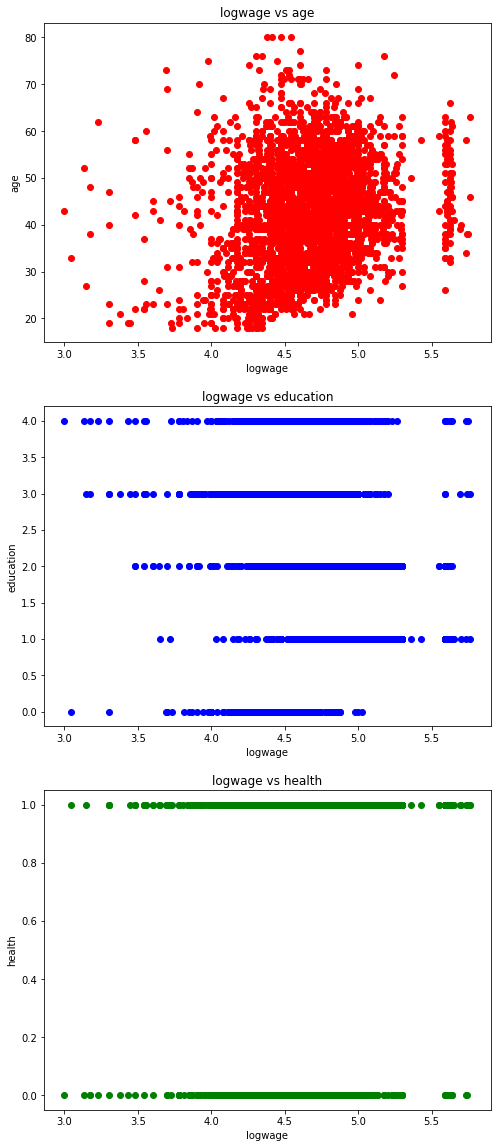

In [34]:
fig1, axs = plt.subplots(3, 1,figsize=(8,20))
axs[0].scatter(y,x['age'],color='red')
axs[0].set_title('logwage vs age')
axs[0].set_xlabel('logwage')
axs[0].set_ylabel('age')

axs[1].scatter(y,x['education'],color='blue')
axs[1].set_title('logwage vs education')
axs[1].set_xlabel('logwage')
axs[1].set_ylabel('education')

axs[2].scatter(y,x['health'],color='green')
axs[2].set_title('logwage vs health')
axs[2].set_xlabel('logwage')
axs[2].set_ylabel('health')


In [35]:
fig1.savefig("1.png")

In [36]:
print(x)

      age  education  health
0      18          0       0
1      24          2       1
2      45          4       0
3      43          2       1
4      50          3       0
...   ...        ...     ...
2995   44          4       1
2996   30          3       1
2997   27          0       0
2998   27          4       1
2999   55          3       0

[3000 rows x 3 columns]


# Getting OLS results for model 1:
#𝑙𝑜𝑔𝑤𝑎𝑔𝑒𝒊 = 𝛽0 + 𝛽1𝑎𝑔𝑒𝒊 + 𝛽2𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝒊 + 𝛽3ℎ𝑒𝑎𝑙𝑡ℎ𝒊 + 𝜀𝒊

In [37]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
results=model.summary(alpha=0.05)
print(results)

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.44e-62
Time:                        06:28:06   Log-Likelihood:                -977.79
No. Observations:                3000   AIC:                             1964.
Df Residuals:                    2996   BIC:                             1988.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3042      0.030    141.985      0.0

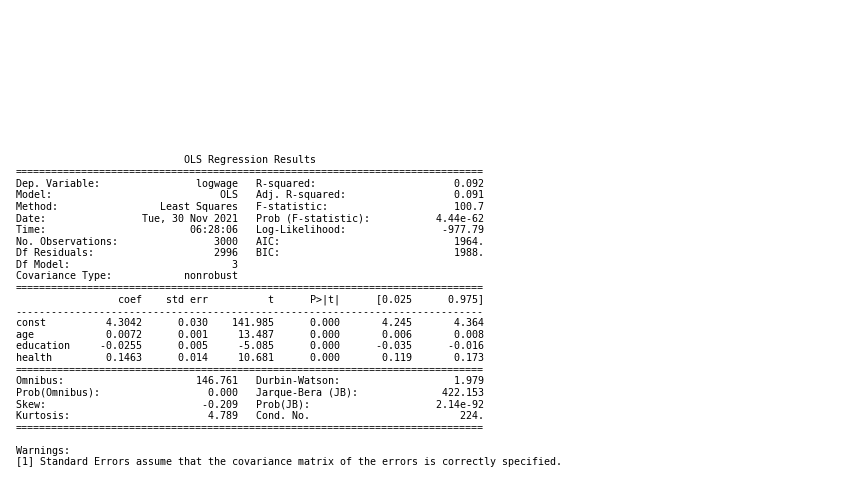

In [38]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result.png')

In [39]:
ypred = model.predict(x)

#Plotting Predicted logwage vs Real logwage with different independent variables

Text(0, 0.5, 'logwage')

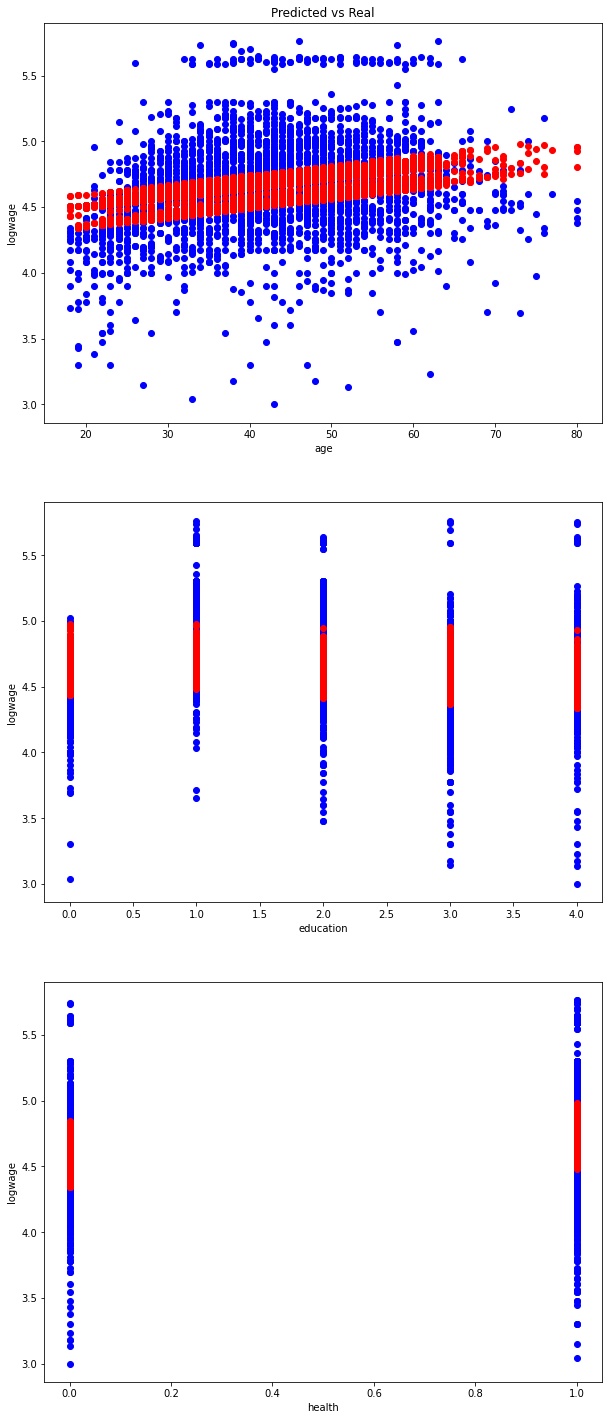

In [40]:
fig2, axs = plt.subplots(3, 1,figsize=(10,25))

axs[0].scatter(x['age'],y,color='blue')
axs[0].scatter(x['age'],ypred,color='red')
axs[0].set_xlabel('age')
axs[0].set_ylabel('logwage')
axs[0].set_title('Predicted vs Real')

axs[1].scatter(x['education'],y,color='blue')
axs[1].scatter(x['education'],ypred,color='red')
axs[1].set_xlabel('education')
axs[1].set_ylabel('logwage')

axs[2].scatter(x['health'],y,color='blue')
axs[2].scatter(x['health'],ypred,color='red')
axs[2].set_xlabel('health')
axs[2].set_ylabel('logwage')

In [41]:
fig2.savefig("2.png")

#Setting independent and dependent variables for model:
#𝑎𝑔𝑒𝑖 = 𝛾0 + 𝛾1ℎ𝑒𝑎𝑙𝑡ℎ𝑖 + 𝜗𝑖

In [42]:
x1 = df['health']
y1 = df['age']

In [43]:
print(y)

0       4.318063
1       4.255273
2       4.875061
3       5.041393
4       4.318063
          ...   
2995    5.041393
2996    4.602060
2997    4.193125
2998    4.477121
2999    4.505150
Name: logwage, Length: 3000, dtype: float64


#Plotting Age vs Health

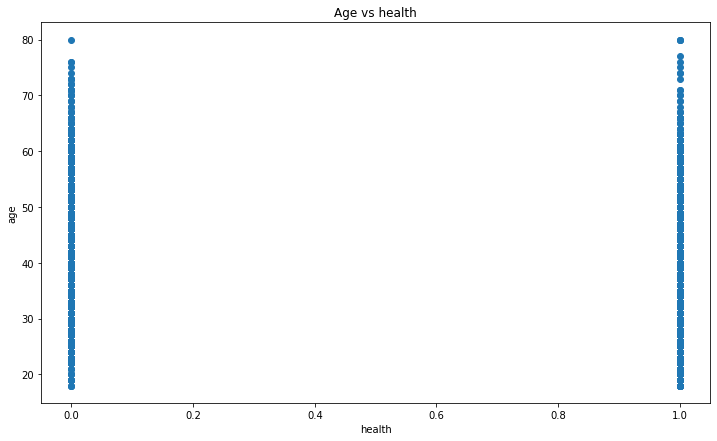

In [44]:
plt.scatter(x1,y1)
plt.title('Age vs health')
plt.xlabel('health')
plt.ylabel('age')

plt.show()

In [45]:
print(y1)

0       18
1       24
2       45
3       43
4       50
        ..
2995    44
2996    30
2997    27
2998    27
2999    55
Name: age, Length: 3000, dtype: int64


#Getting OLS results for our model

In [46]:
import statsmodels.api as sm
x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
results1=model1.summary(alpha=0.05)
print(results1)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     58.99
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.14e-14
Time:                        06:28:08   Log-Likelihood:                -11565.
No. Observations:                3000   AIC:                         2.313e+04
Df Residuals:                    2998   BIC:                         2.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9476      0.390    115.163      0.0

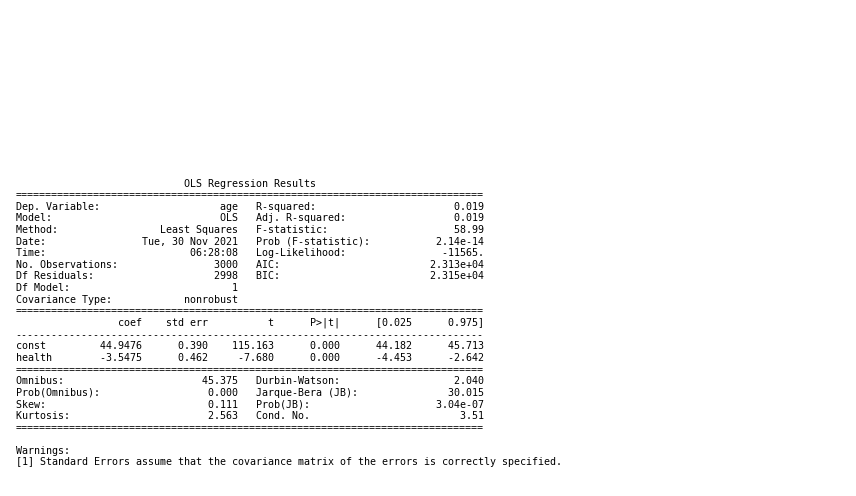

In [47]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result1.png')

#Getting residual age* by using 
#𝑎𝑔𝑒𝑖∗ = 𝑎𝑔𝑒𝑖 − 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑 𝑎𝑔𝑒𝑖

In [48]:
y1pred = model1.predict(x1)
print(y1pred)

0       44.947552
1       41.400093
2       44.947552
3       41.400093
4       44.947552
          ...    
2995    41.400093
2996    41.400093
2997    44.947552
2998    41.400093
2999    44.947552
Length: 3000, dtype: float64


In [49]:
residual_age=y1-y1pred

#Setting independent and dependent variables for model:
#𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝑖 = 𝜃0 + 𝜃1ℎ𝑒𝑎𝑙𝑡ℎ𝑖 + 𝜑𝑖

In [50]:
x2 = df['health']
y2 = df['education']

#Getting OLS results

In [51]:
import statsmodels.api as sm
x2 = sm.add_constant(x2)
model2 = sm.OLS(y2, x2).fit()
results2=model2.summary(alpha=0.05)
print(results2)

                            OLS Regression Results                            
Dep. Variable:              education   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.138
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0420
Time:                        06:28:09   Log-Likelihood:                -4862.2
No. Observations:                3000   AIC:                             9728.
Df Residuals:                    2998   BIC:                             9740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5082      0.042     60.022      0.0

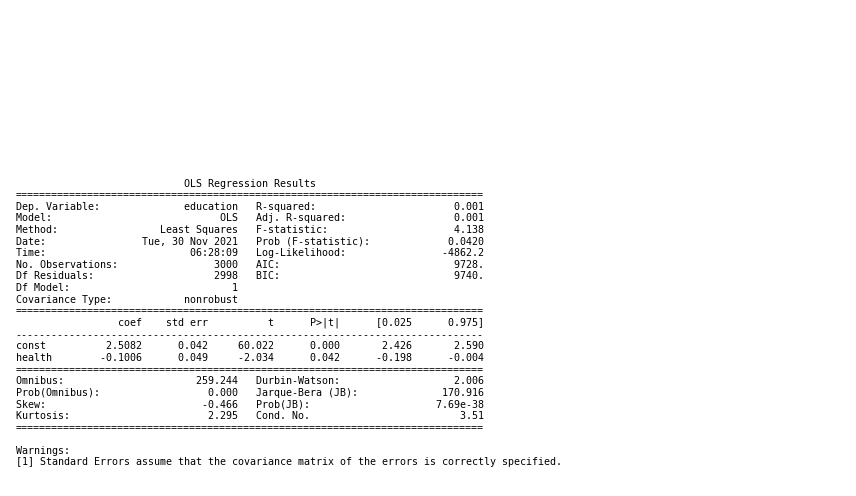

In [52]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model2.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result2.png')

#Getting residual education* by using
#𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝑖∗ = 𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝑖 − 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑 𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝑖

In [53]:
y2pred = model2.predict(x2)
print(ypred)

0       4.434653
1       4.573427
2       4.528258
3       4.711133
4       4.590017
          ...   
2995    4.667339
2996    4.591392
2997    4.499883
2998    4.544128
2999    4.626256
Length: 3000, dtype: float64


In [54]:
residual_education=y2-y2pred

#Plotting residual age* and residual education* against logwage

Text(0, 0.5, 'logwage')

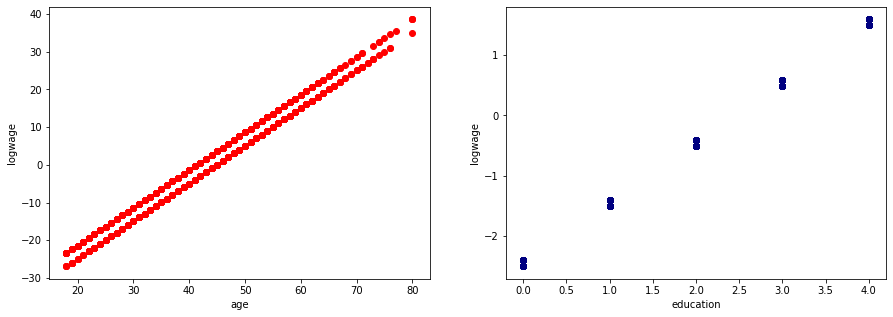

In [55]:
fig3, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(y1,residual_age,color='red')
axs[0].set_xlabel('age')
axs[0].set_ylabel('logwage')

axs[1].scatter(y2,residual_education,color='navy')
axs[1].set_xlabel('education')
axs[1].set_ylabel('logwage')

In [56]:
fig3.savefig("3.png")

In [57]:
residual_age

0      -26.947552
1      -17.400093
2        0.052448
3        1.599907
4        5.052448
          ...    
2995     2.599907
2996   -11.400093
2997   -17.947552
2998   -14.400093
2999    10.052448
Length: 3000, dtype: float64

In [58]:
residual_education

0      -2.508159
1      -0.407563
2       1.491841
3      -0.407563
4       0.491841
          ...   
2995    1.592437
2996    0.592437
2997   -2.508159
2998    1.592437
2999    0.491841
Length: 3000, dtype: float64

#Setting our independent and dependent variables for model:
#𝑙𝑜𝑔𝑤𝑎𝑔𝑒𝒊 = 𝛼0 + 𝛼1𝑎𝑔𝑒𝑖∗ + 𝛼2𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛𝑖∗ + 𝛿𝒊

In [59]:
df['Residual Age'] = residual_age
df['Residual Education'] =residual_education

In [60]:
x3 = df[['Residual Age','Residual Education']]
y3 = df['logwage']

In [61]:
df

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,Residual Age,Residual Education
0,231655,2006,18,1. Never Married,1. White,0,2. Middle Atlantic,1. Industrial,0,2. No,4.318063,75.043154,-26.947552,-2.508159
1,86582,2004,24,1. Never Married,1. White,2,2. Middle Atlantic,2. Information,1,2. No,4.255273,70.476020,-17.400093,-0.407563
2,161300,2003,45,2. Married,1. White,4,2. Middle Atlantic,1. Industrial,0,1. Yes,4.875061,130.982177,0.052448,1.491841
3,155159,2003,43,2. Married,3. Asian,2,2. Middle Atlantic,2. Information,1,1. Yes,5.041393,154.685293,1.599907,-0.407563
4,11443,2005,50,4. Divorced,1. White,3,2. Middle Atlantic,2. Information,0,1. Yes,4.318063,75.043154,5.052448,0.491841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,376816,2008,44,2. Married,1. White,4,2. Middle Atlantic,1. Industrial,1,1. Yes,5.041393,154.685293,2.599907,1.592437
2996,302281,2007,30,2. Married,1. White,3,2. Middle Atlantic,1. Industrial,1,2. No,4.602060,99.689464,-11.400093,0.592437
2997,10033,2005,27,2. Married,2. Black,0,2. Middle Atlantic,1. Industrial,0,2. No,4.193125,66.229408,-17.947552,-2.508159
2998,14375,2005,27,1. Never Married,1. White,4,2. Middle Atlantic,1. Industrial,1,1. Yes,4.477121,87.981033,-14.400093,1.592437


#Getting OLS results

In [62]:
import statsmodels.api as sm
x3 = sm.add_constant(x3)
model3 = sm.OLS(y3, x3).fit()
results3=model3.summary(alpha=0.05)
print(results3)

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.62e-45
Time:                        06:28:10   Log-Likelihood:                -1018.6
No. Observations:                3000   AIC:                             2043.
Df Residuals:                    2997   BIC:                             2061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6539      0

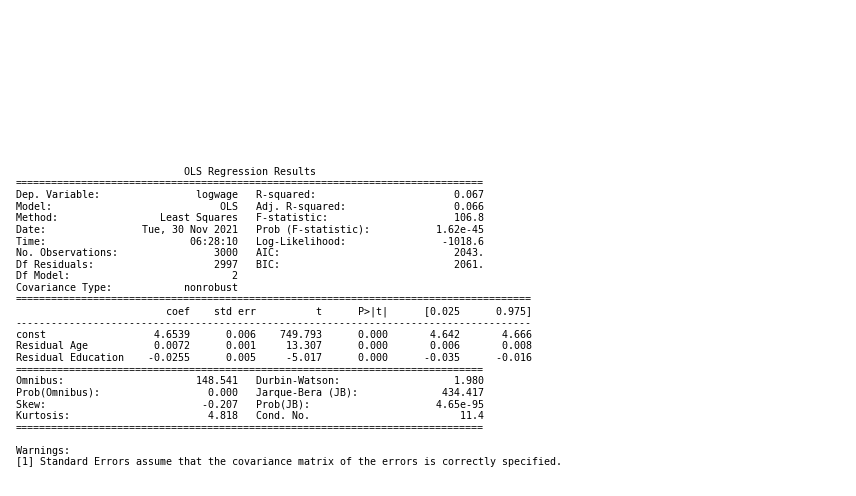

In [63]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model3.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Result3.png')

In [64]:
ypred_residual=model3.predict(x3)

#Plotting the results

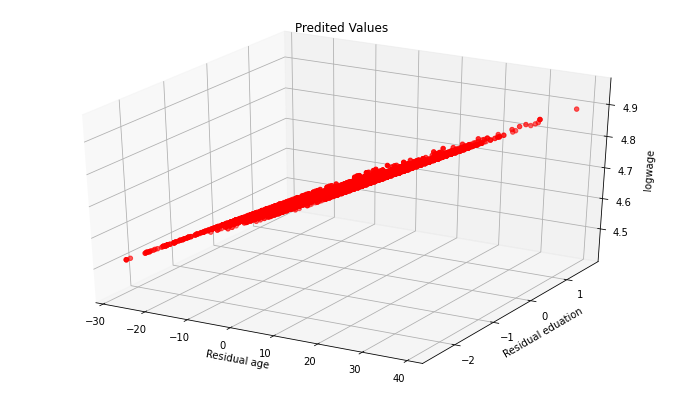

In [65]:
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')
ax.scatter(df['Residual Age'],df['Residual Education'],ypred_residual,color='red')
ax.set_title('Predited Values')
ax.set_xlabel('Residual age')
ax.set_ylabel('Residual eduation')
ax.set_zlabel('logwage')

plt.show()

In [66]:
fig4.savefig("4.png")